# **Descripción de la actividad**

Trabajas en una empresa de tecnología y el gerente te ha pedido desarrollar un modelo de aprendizaje supervisado que pueda predecir el precio de las laptops a partir de sus especificaciones.

* La empresa ha recopilado datos de más de 1300 laptops (ver anexo), incluyendo información como la marca, el modelo, el tamaño de la pantalla, la capacidad de almacenamiento, la memoria RAM, el procesador, la tarjeta gráfica y el sistema operativo.

* Con estos datos, tu objetivo es construir un modelo que pueda predecir de manera precisa el precio de una laptop dada.

* Deberás presentar un notebook detallando las etapas del flujo de trabajo de tu solución de machine learning para el caso descrito


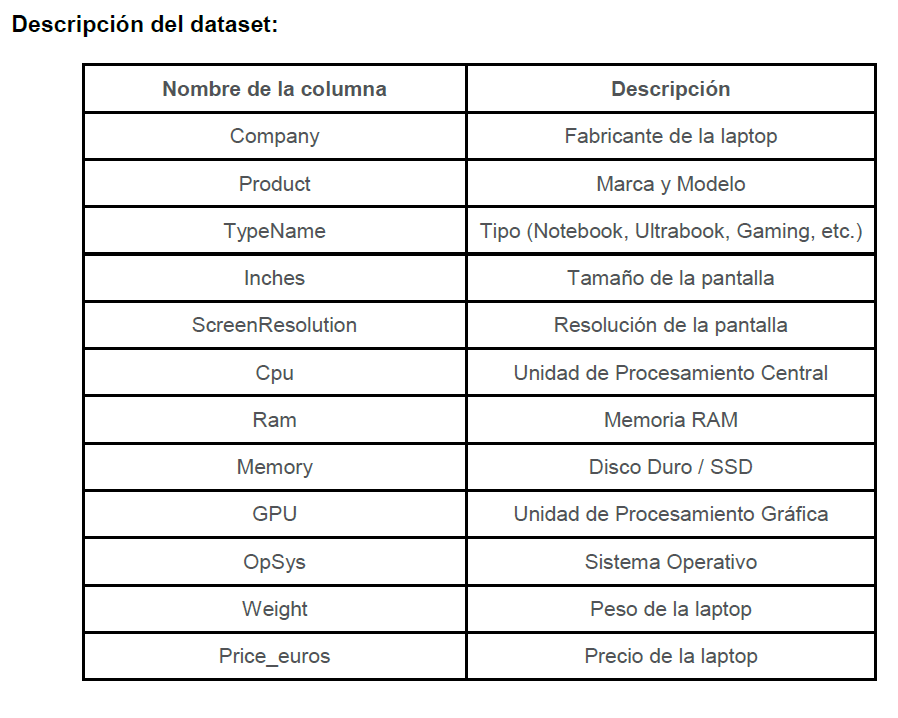

# **CRITERIO 1) Análisis exploratorio de datos**

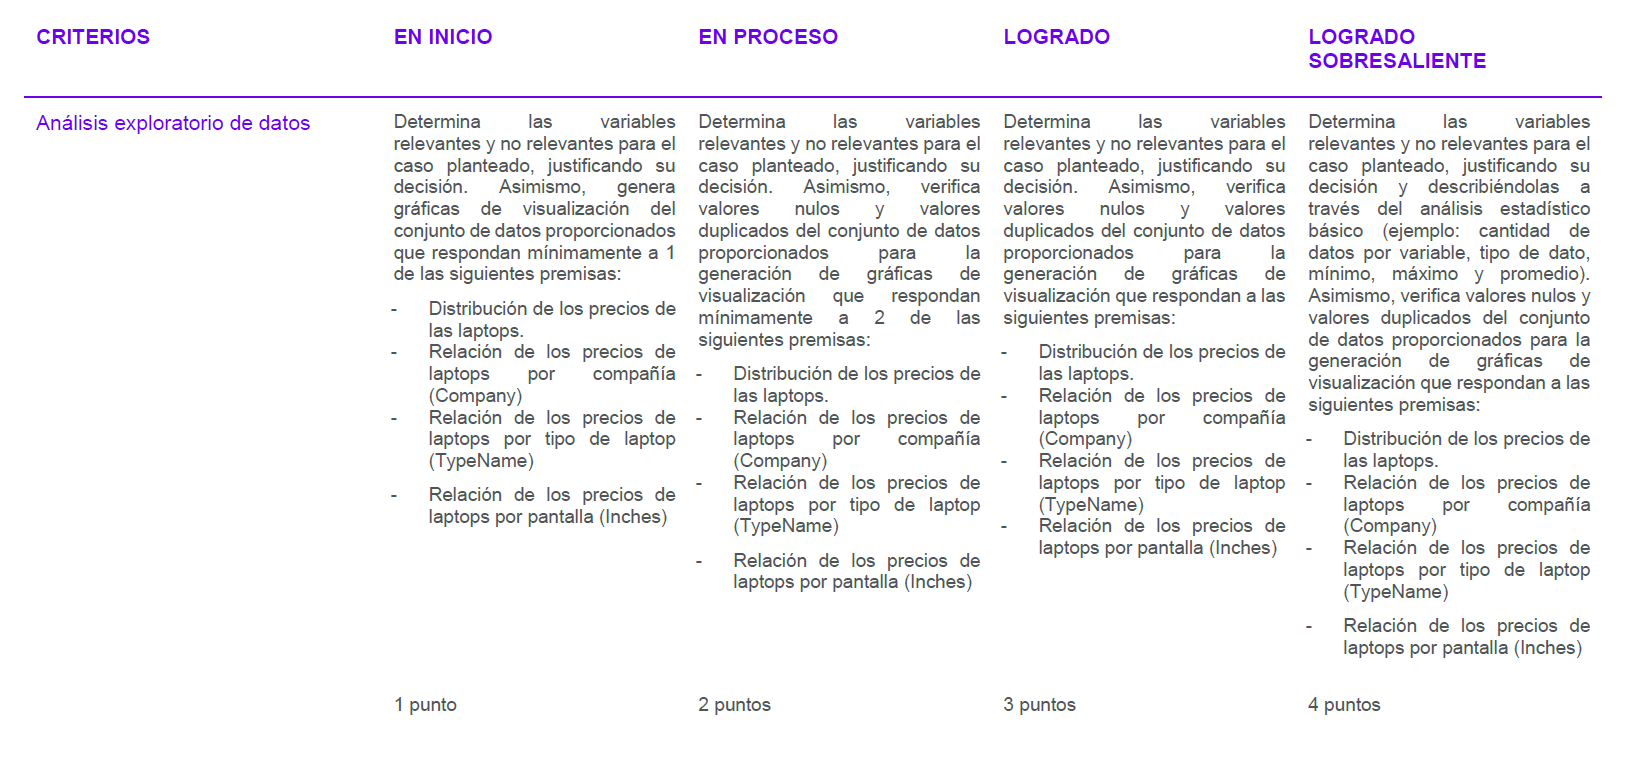

Visualizaciones: Analisis Exploratorio de los Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

In [ ]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


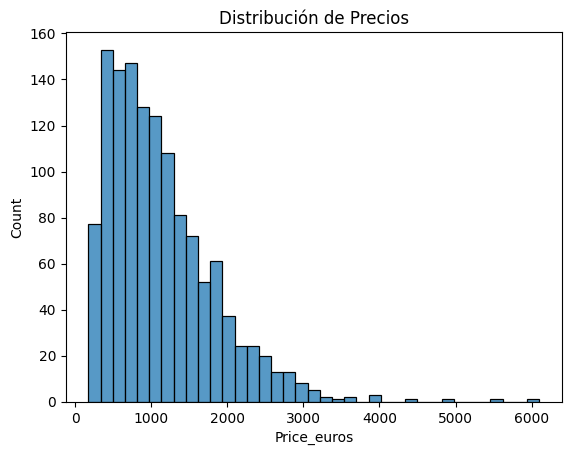

In [ ]:
# Grafico 1: Histograma (Precios)

sns.histplot(df['Price_euros'])
plt.title("Distribución de Precios")
plt.show()


Insights: Al parecer la mayoria de laptops esta rondando los 1000 euros

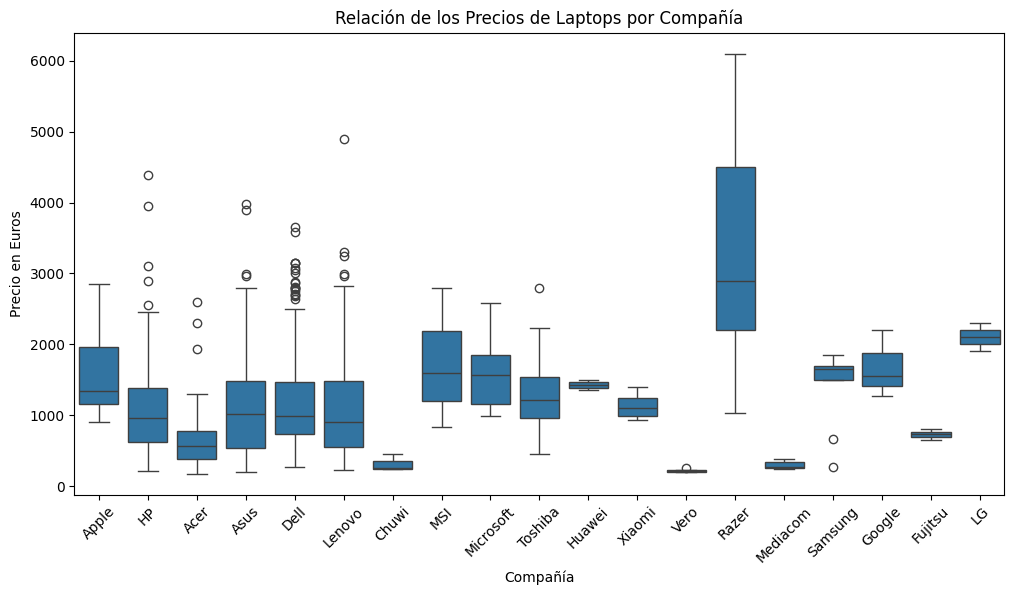

In [ ]:
# Grafico 2: Relación de los precios de laptops por compañía (Company)
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.title("Relación de los Precios de Laptops por Compañía")# Da nombre al Gráfico: Relación de precios de Laptops por compañia
plt.xlabel("Compañía") # Se da nombre al eje x
plt.ylabel("Precio en Euros") # Se da nombre al eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

El grafico muestra que se cuenta con información de 19 marcas de laptops, con sus variaciones de precios. De ellas la marca Razer es la que mayor variabilidad de precios tiene y las que menor variabiliad de precios presentan son las marcas XIOMI y LG. Las marca que tiene el mayor precio es la marca RAZER. Según el gráfico se puede observar que en la mayoría de las marcas los precios oscilan entre los 1000 y 2000 euros y la media se encuentre alredeor de los 1500 euros.

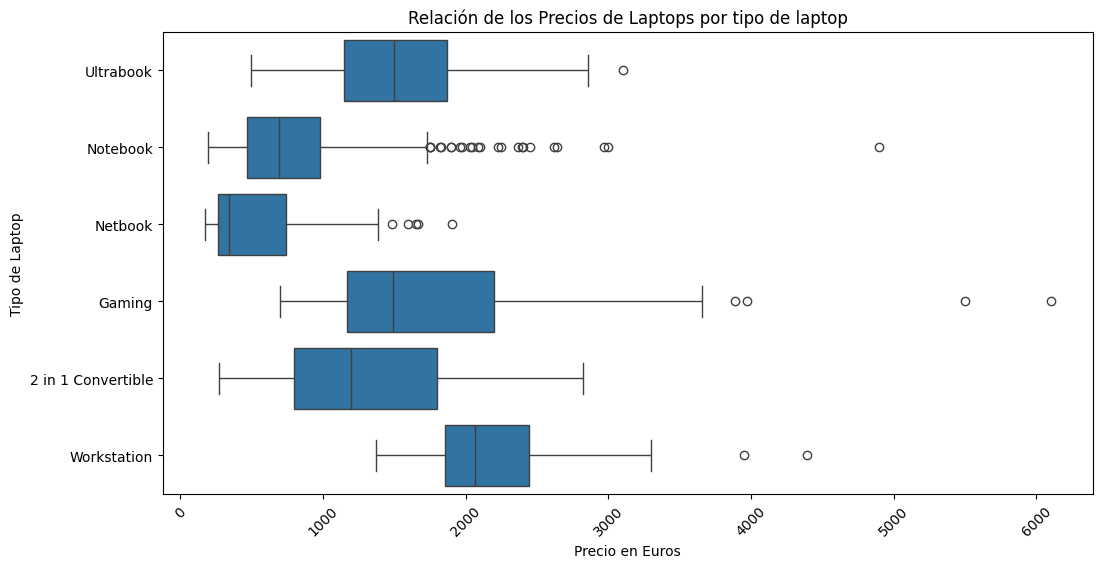

In [ ]:
# grafico 3 Relación de los precios de laptops por tipo de laptop
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x='Price_euros', y='TypeName', data=df)
plt.title("Relación de los Precios de Laptops por tipo de laptop") # Da nombre al Gráfico: Relación de precios de Laptops por tipo de laptops
plt.xlabel("Precio en Euros") # Se da nombre al eje x
plt.ylabel("Tipo de Laptop") # Se da nombre al eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

El grafico muestra que hay seis tipo de laptops, en este caso se aprecia que la variabilidad de precios no es muy dispersa como en el caso de las marcas, pero en los tipos gaming, ultrabook y 2 in1 convertible, la variación de precios si es un pocos mayor.


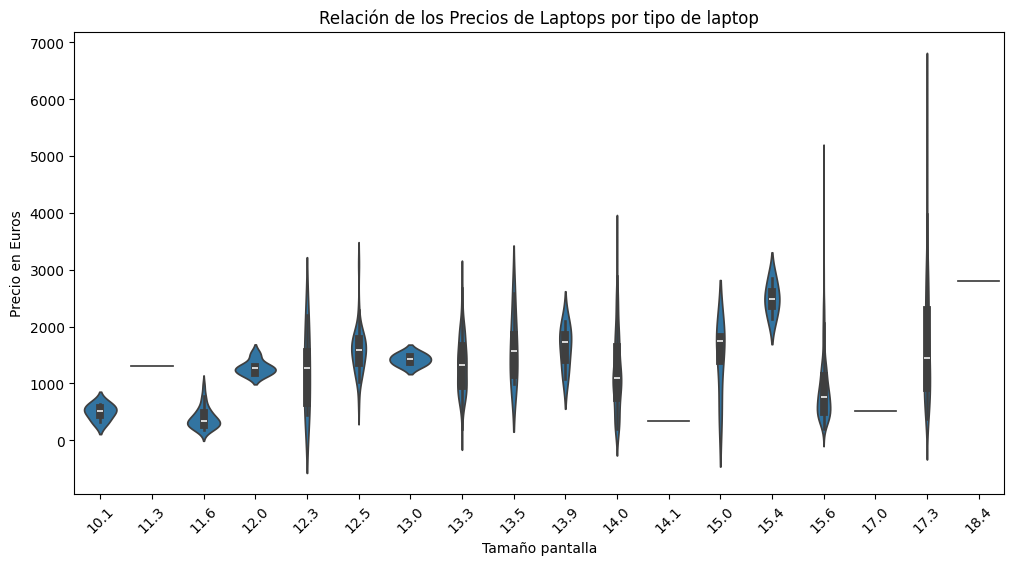

In [ ]:
# grafico 4 Relación de los precios de laptops por pantalla
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
sns.violinplot(x='Inches', y='Price_euros', data=df)
plt.title("Relación de los Precios de Laptops por tipo de laptop") # Da nombre al Gráfico: Relación de precios de Laptops por tipo de laptops
plt.xlabel("Tamaño pantalla") # Se da nombre al eje x
plt.ylabel("Precio en Euros") # Se da nombre al eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Hay mucha variabilidad de los precios por tamaño de pantalla, siendo que la muestra mayor rango de precios son las laptos de 17.3 pulgadas.

# **CRITERIO 2) Ingeniería de características (Feature)**

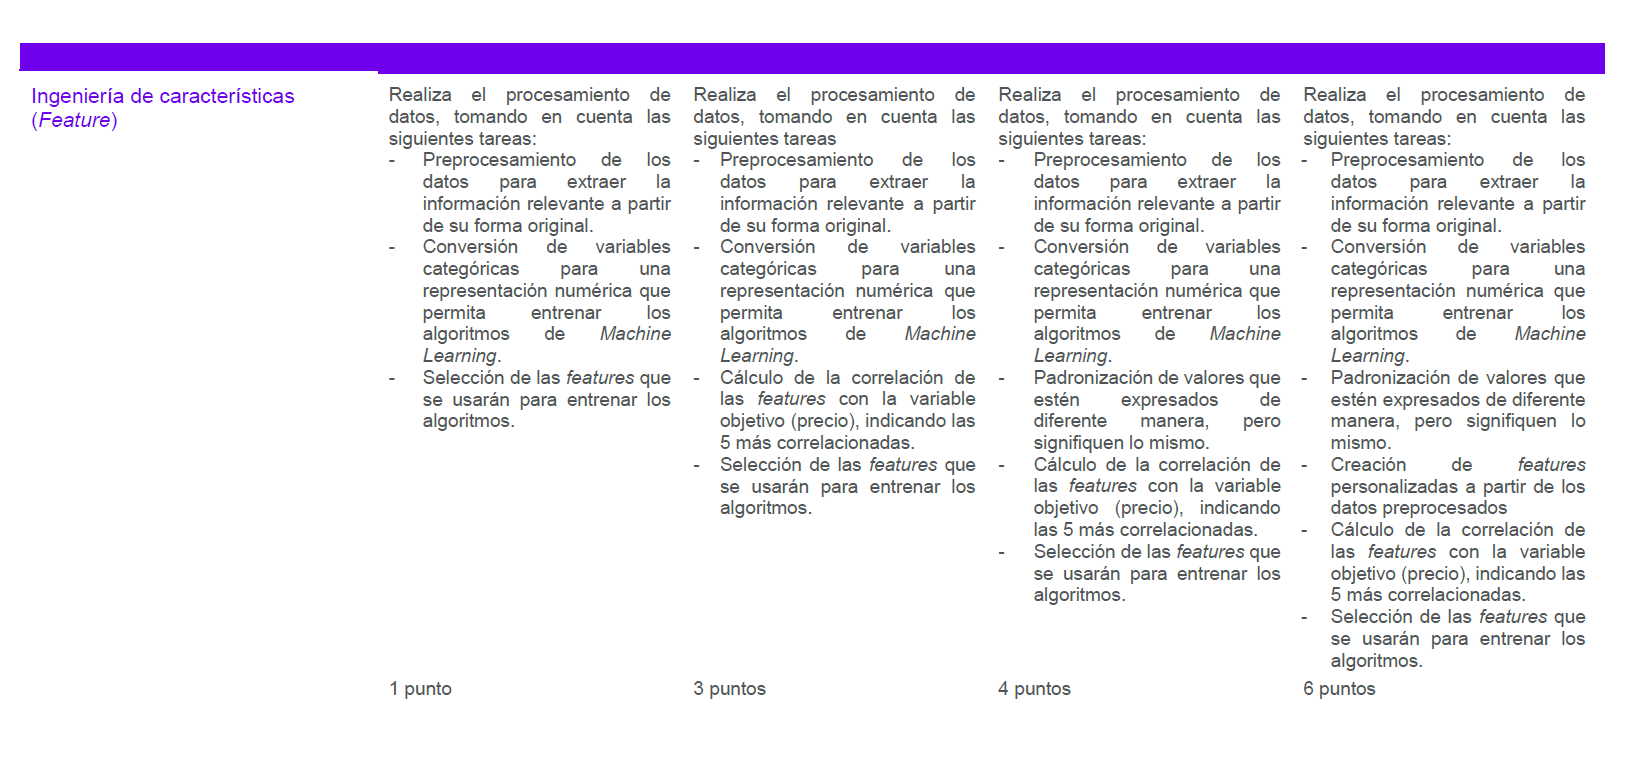

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
#************************
# Columna: Weight

df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [ ]:
#************************
# Columna: OpSys

df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
df = pd.get_dummies(df, columns=['OpSys'], drop_first=True, dtype=int)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37,1339.69,0,0,0,0,0,0,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34,898.94,0,0,0,0,0,0,0,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86,575.00,0,0,0,1,0,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83,2537.45,0,0,0,0,0,0,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37,1803.60,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Company             1303 non-null   object 
 2   Product             1303 non-null   object 
 3   TypeName            1303 non-null   object 
 4   Inches              1303 non-null   float64
 5   ScreenResolution    1303 non-null   object 
 6   Cpu                 1303 non-null   object 
 7   Ram                 1303 non-null   object 
 8   Memory              1303 non-null   object 
 9   Gpu                 1303 non-null   object 
 10  Weight              1303 non-null   float64
 11  Price_euros         1303 non-null   float64
 12  OpSys_Chrome OS     1303 non-null   int64  
 13  OpSys_Linux         1303 non-null   int64  
 14  OpSys_Mac OS X      1303 non-null   int64  
 15  OpSys_No OS         1303 non-null   int64  
 16  OpSys_

In [ ]:
# Columna: Cpu
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [ ]:
len(df['Cpu'].value_counts())

118

In [ ]:
# Regular Expressions

In [ ]:
ejemplo = "Intel Core i5 2.3GHz"

float(ejemplo.split()[-1].replace("GHz", ""))

2.3

In [ ]:
df['GHz'] = df['Cpu'].apply(lambda x: x.split()[-1].replace("GHz", "")).astype(float)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1339.69,0,0,0,0,0,0,0,1,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,898.94,0,0,0,0,0,0,0,1,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,575.00,0,0,0,1,0,0,0,0,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,2537.45,0,0,0,0,0,0,0,1,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1803.60,0,0,0,0,0,0,0,1,3.1


In [ ]:
# Columna: ScreenResolution
# Regular Expressions

# IPS Panel Retina Display 2880x1800

df[['screen_width', 'screen_height']] = df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz,screen_width,screen_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,0,0,0,0,0,0,1,2.3,2560.0,1600.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,0,0,0,0,0,0,1,1.8,1440.0,900.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,0,0,1,0,0,0,0,2.5,1920.0,1080.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,0,0,0,0,0,0,1,2.7,2880.0,1800.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,0,0,0,0,0,0,1,3.1,2560.0,1600.0


In [ ]:
# Tarea 2:
# convertir a numerico: la columna Ram
# ubicar que 1 columna puede ser usada para OHE y aplicar OHE


**Tarea 2.1: Convertir a numérico la columna Ram**

In [ ]:
#Convertimos a numérico la colummna Ram, haciendo uso de la función panada str.replace() y astype()
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz,screen_width,screen_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,0,0,0,0,0,0,1,2.3,2560.0,1600.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,0,0,0,0,0,0,1,1.8,1440.0,900.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,0,0,1,0,0,0,0,2.5,1920.0,1080.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,0,0,0,0,0,0,1,2.7,2880.0,1800.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,0,0,0,0,0,0,1,3.1,2560.0,1600.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Company             1303 non-null   object 
 2   Product             1303 non-null   object 
 3   TypeName            1303 non-null   object 
 4   Inches              1303 non-null   float64
 5   ScreenResolution    1303 non-null   object 
 6   Cpu                 1303 non-null   object 
 7   Ram                 1303 non-null   int64  
 8   Memory              1303 non-null   object 
 9   Gpu                 1303 non-null   object 
 10  Weight              1303 non-null   float64
 11  Price_euros         1303 non-null   float64
 12  OpSys_Chrome OS     1303 non-null   int64  
 13  OpSys_Linux         1303 non-null   int64  
 14  OpSys_Mac OS X      1303 non-null   int64  
 15  OpSys_No OS         1303 non-null   int64  
 16  OpSys_

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz,screen_width,screen_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,0,0,0,0,0,0,1,2.3,2560.0,1600.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,0,0,0,0,0,0,1,1.8,1440.0,900.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,0,0,1,0,0,0,0,2.5,1920.0,1080.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,0,0,0,0,0,0,1,2.7,2880.0,1800.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,0,0,0,0,0,0,1,3.1,2560.0,1600.0


**Tarea 2.2 ubicar que 1 columna puede ser usada para OHE y aplicar OHE**

In [ ]:
# Se ha ubicado la columna Company
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
len(df['Company'].value_counts())

19

In [ ]:
df = pd.get_dummies(df, columns=['Company'], drop_first=True, dtype=int)

In [ ]:
df.head()

,laptop_ID,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,...,0,0,0,0,0,0,0,0,0,0
1,2,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,...,0,0,0,0,0,0,0,0,0,0
2,3,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,...,0,0,0,0,0,0,0,0,0,0
3,4,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,...,0,0,0,0,0,0,0,0,0,0
4,5,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Product             1303 non-null   object 
 2   TypeName            1303 non-null   object 
 3   Inches              1303 non-null   float64
 4   ScreenResolution    1303 non-null   object 
 5   Cpu                 1303 non-null   object 
 6   Ram                 1303 non-null   int64  
 7   Memory              1303 non-null   object 
 8   Gpu                 1303 non-null   object 
 9   Weight              1303 non-null   float64
 10  Price_euros         1303 non-null   float64
 11  OpSys_Chrome OS     1303 non-null   int64  
 12  OpSys_Linux         1303 non-null   int64  
 13  OpSys_Mac OS X      1303 non-null   int64  
 14  OpSys_No OS         1303 non-null   int64  
 15  OpSys_Windows 10    1303 non-null   int64  
 16  OpSys_

In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [ ]:
df = pd.get_dummies(df, columns=['TypeName'], drop_first=True, dtype=int)

In [ ]:
df.head()

,laptop_ID,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   laptop_ID             1303 non-null   int64  
 1   Product               1303 non-null   object 
 2   Inches                1303 non-null   float64
 3   ScreenResolution      1303 non-null   object 
 4   Cpu                   1303 non-null   object 
 5   Ram                   1303 non-null   int64  
 6   Memory                1303 non-null   object 
 7   Gpu                   1303 non-null   object 
 8   Weight                1303 non-null   float64
 9   Price_euros           1303 non-null   float64
 10  OpSys_Chrome OS       1303 non-null   int64  
 11  OpSys_Linux           1303 non-null   int64  
 12  OpSys_Mac OS X        1303 non-null   int64  
 13  OpSys_No OS           1303 non-null   int64  
 14  OpSys_Windows 10      1303 non-null   int64  
 15  OpSys_Windows 10 S   

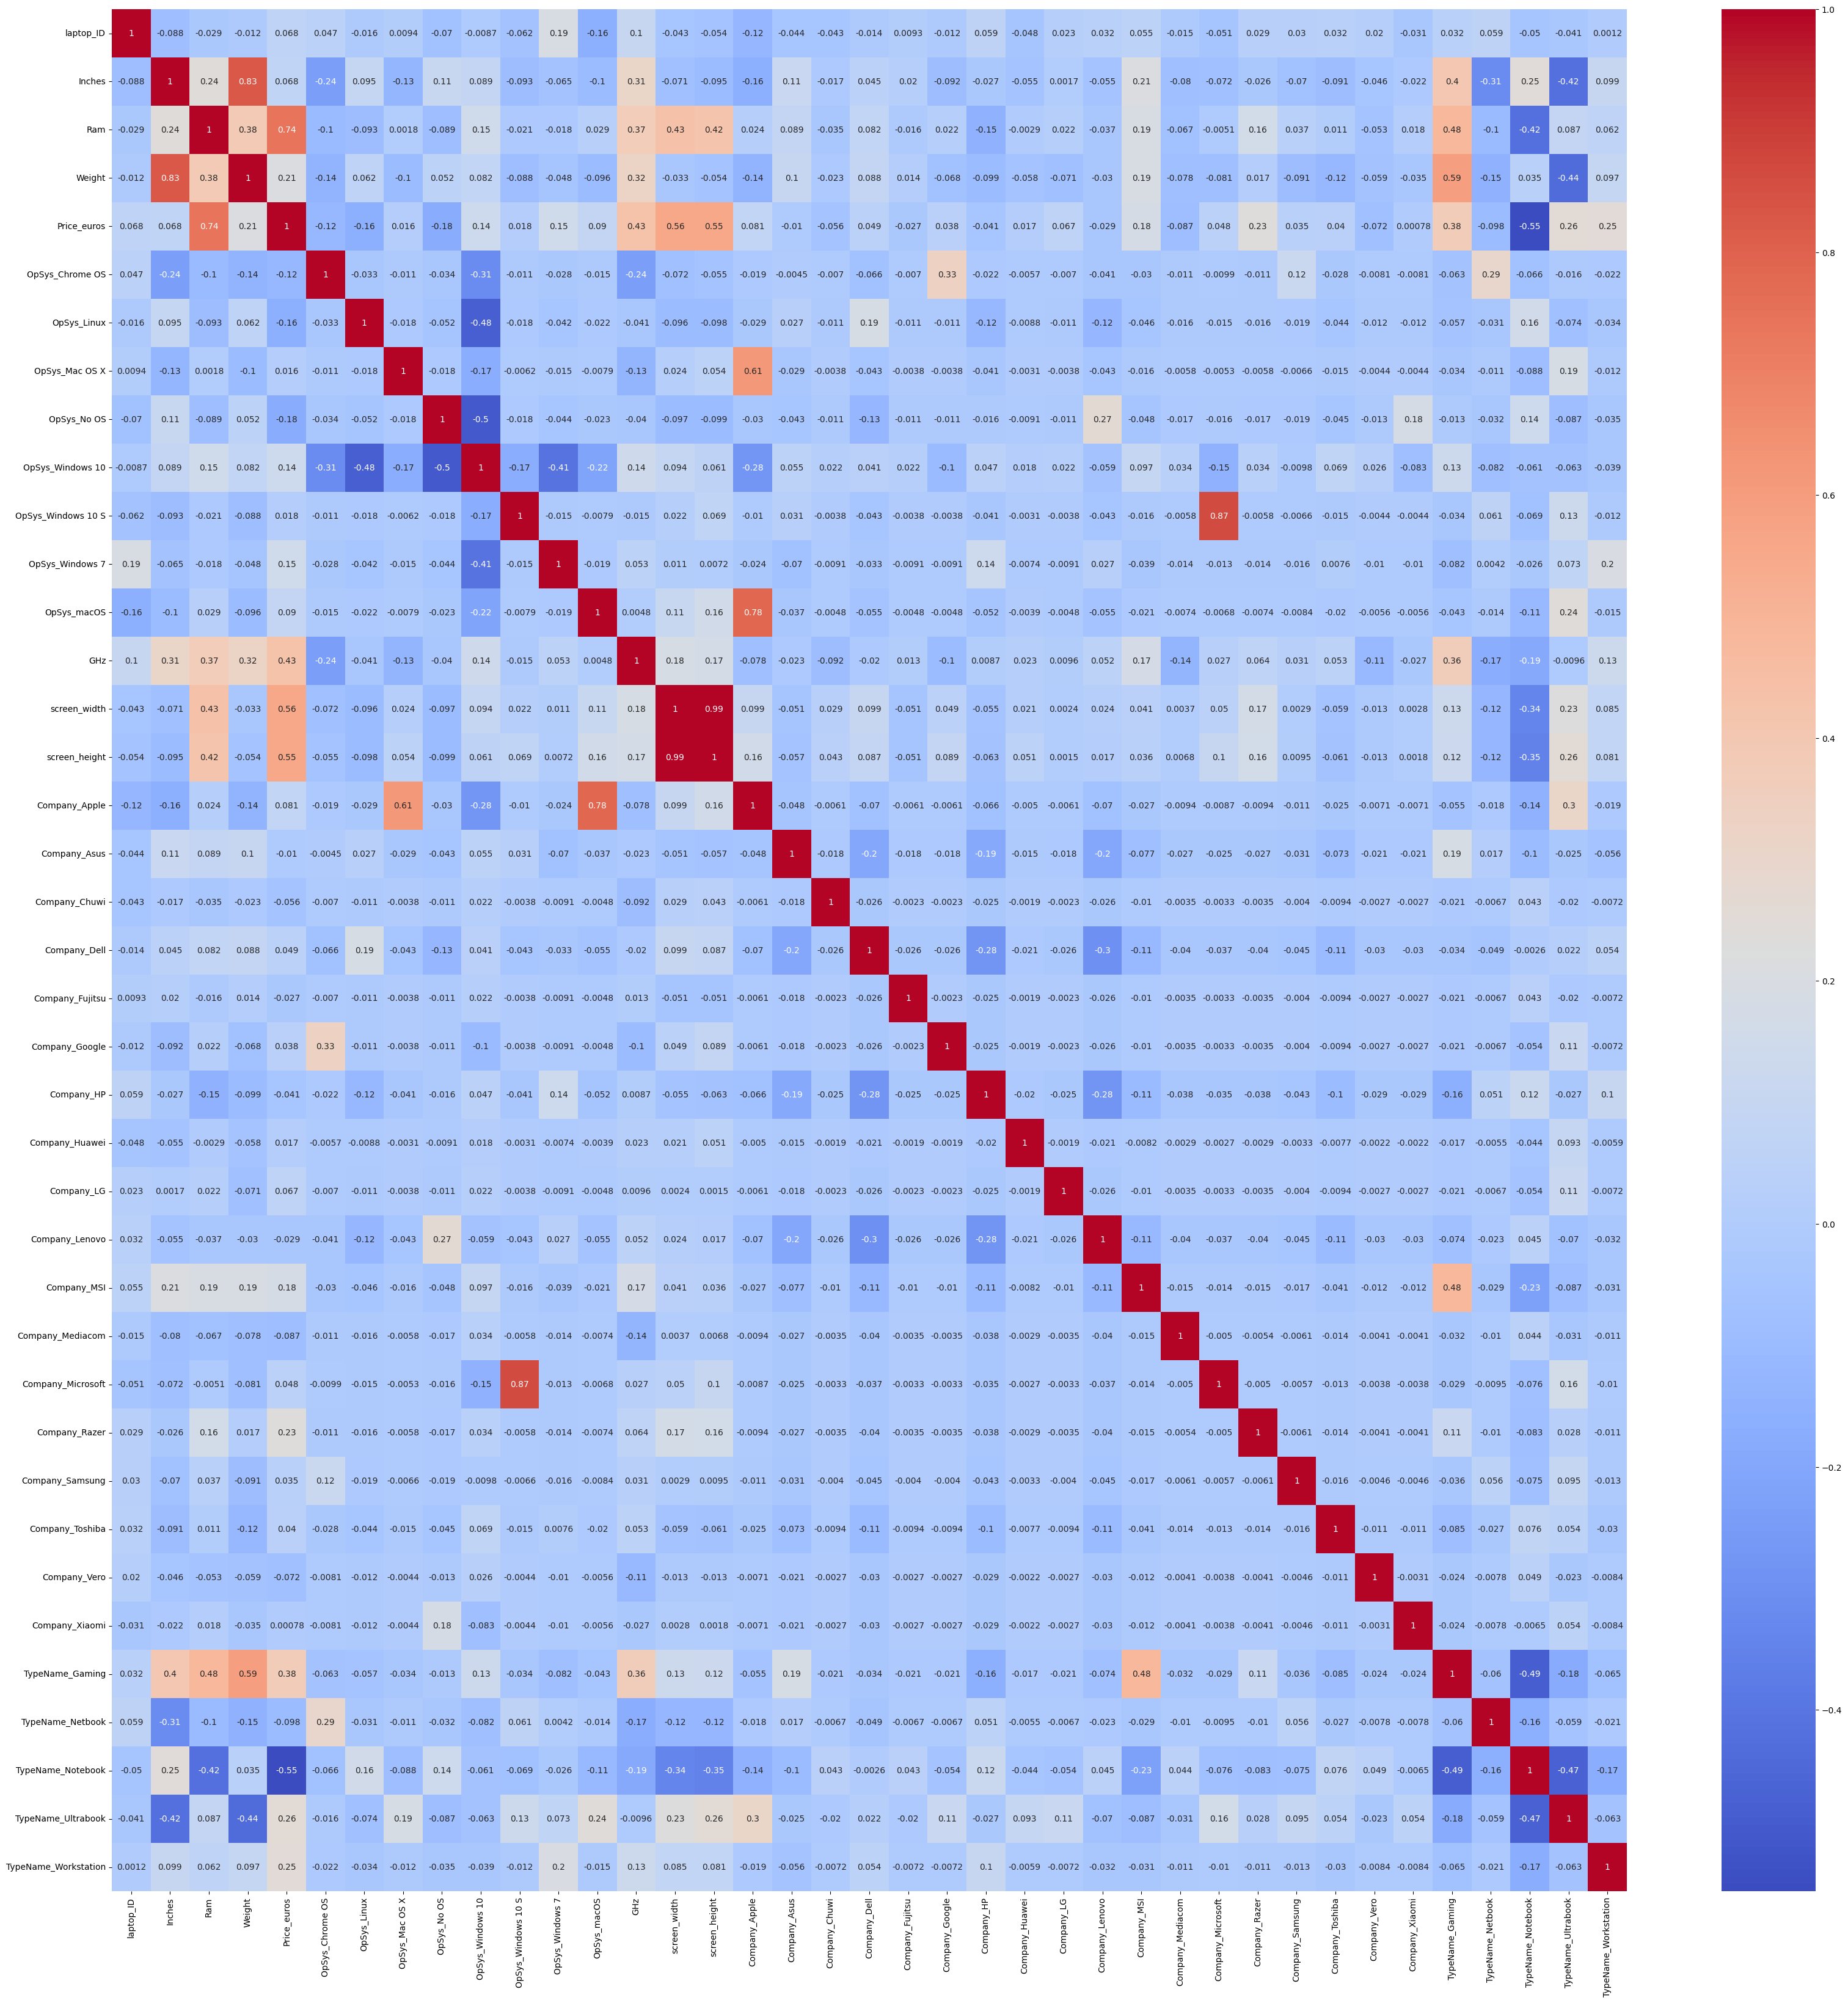

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 1))
variable_interes = 'Price_euros'
corr_matrix = df.corr(numeric_only=True)

<Figure size 1000x100 with 0 Axes>

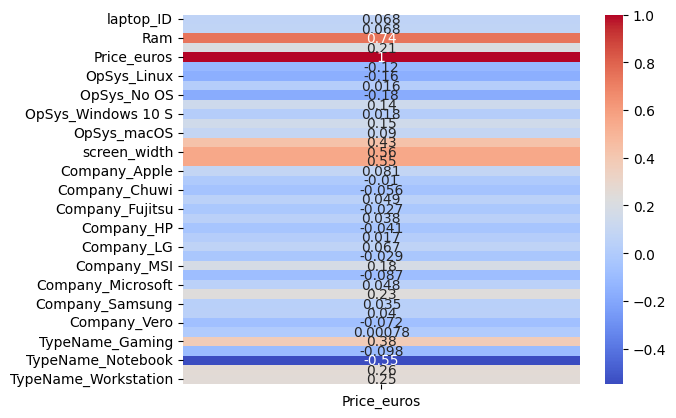

In [ ]:
corr_variable_interes = corr_matrix[[variable_interes]]
sns.heatmap(corr_variable_interes, cmap='coolwarm', annot=True)
plt.show()

Del Gráfico se obtiene las siguientes correlaciones más relevantes > a 0.50 con la variable Price_euros: Ram = 0.74; TypeName_Notebook = -0.55; screen_width = 0.56; screen_height= 0.55 y GHZ = 0.43. Descartamos TypeName_Notebook, ya que se trata de un modelo de laptop, pero elegimo GHZ ya que tiene un valor cercano a 0.50.


# **CRITERIO 3) Fase de entrenamiento**

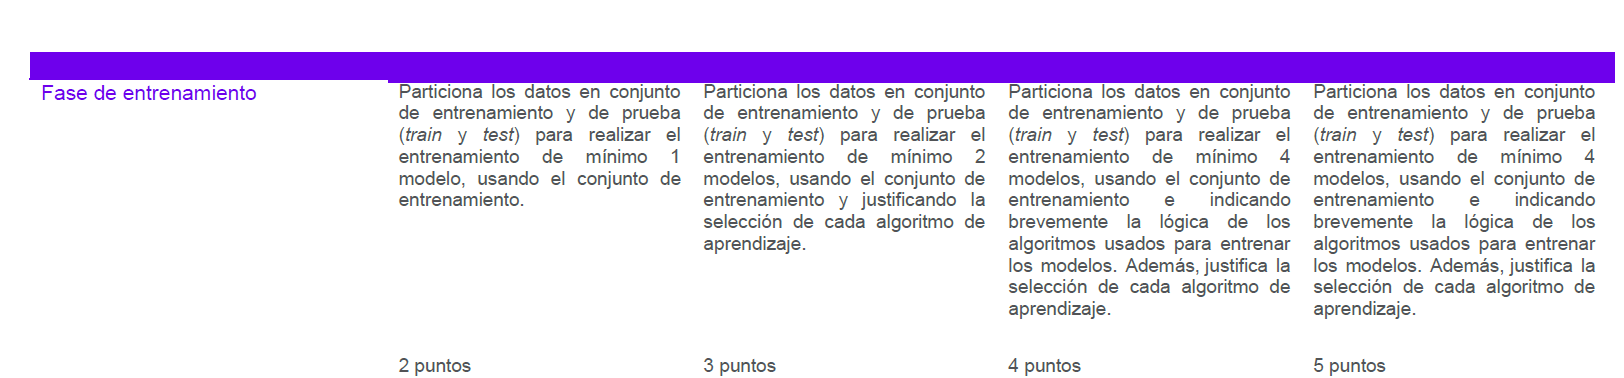

In [ ]:
# Algoritmo # 1:
# columnas elegidas:  ['Ram', 'GHz', 'screen_width', 'screen_height']

In [ ]:
df.columns

Index(['laptop_ID', 'Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'Weight', 'Price_euros', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'GHz',
       'screen_width', 'screen_height', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo',
       'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object')

In [ ]:
# Tarea 3: seleccionar las columnas para X que ustedes concideran son las de mas alta correlacion

# Crear X , y

X = df[['Ram', 'GHz', 'screen_width', 'screen_height']]
y = df['Price_euros']

In [ ]:
X

,Ram,GHz,screen_width,screen_height
0,8,2.3,2560.0,1600.0
1,8,1.8,1440.0,900.0
2,8,2.5,1920.0,1080.0
3,16,2.7,2880.0,1800.0
4,8,3.1,2560.0,1600.0
...,...,...,...,...
1298,4,2.5,1920.0,1080.0
1299,16,2.5,3200.0,1800.0
1300,2,1.6,1366.0,768.0
1301,6,2.5,1366.0,768.0


In [ ]:
# Division de los Datos

# 85% para entrenamiento, 15% para prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train

,Ram,GHz,screen_width,screen_height
409,2,1.10,1366.0,768.0
432,4,2.70,1920.0,1080.0
471,8,2.50,1920.0,1080.0
1156,16,2.80,1920.0,1080.0
174,8,1.60,1920.0,1080.0
...,...,...,...,...
1095,8,2.50,1920.0,1080.0
1130,8,2.70,1366.0,768.0
1294,6,2.90,1920.0,1080.0
860,8,2.50,1920.0,1080.0


In [ ]:
# Estandarizacion

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# Algoritmo 1: Regresion --> buscar algoritmos de Regresion
# Regresion Lineal --> Algoritmo Base

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
# Evaluacion de Algoritmo 1: Evaluacion de Linear Regression

# Hacer predicciones

y_pred_lr = lr.predict(X_test_sc)

# Evaluar que tan correctas / Precisas son las predicciones
# IMPORTANTE: en este caso escoger metricas de regresion: MAE, R2 score

from sklearn.metrics import mean_absolute_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Regresion Lineal MAE: {mae_lr}')
print(f'Regresion Lineal R2: {r2_lr}')

Regresion Lineal MAE: 313.2193694235218
Regresion Lineal R2: 0.6715384678816044


In [ ]:
# Algoritmo 2: Arbol de Decision (Decision Tree)

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [ ]:
# Evaluacion de Algoritmo 2: Evaluacion de Decision Tree

# Hacer predicciones

y_pred_dtr = dtr.predict(X_test_sc)

# Evaluar que tan correctas / Precisas son las predicciones
# IMPORTANTE: en este caso escoger metricas de regresion: MAE, R2 score

from sklearn.metrics import mean_absolute_error, r2_score

mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print(f'Arbol de Decision MAE: {mae_dtr}')
print(f'Arbol de Decision R2: {r2_dtr}')

Arbol de Decision MAE: 245.5896342539666
Arbol de Decision R2: 0.7849559012105711


De acuerdo a estos resultados para el modelo de Arbol de Decisiones, si los precios de las computadoras varían mucho, un MAE de 247 podría ser aceptable; si los precios son bajos, podría indicar que el modelo necesita mejoras. Por otro lado, un R² de 0.784 es bastante bueno, ya que sugiere que el modelo captura la mayor parte de la variabilidad en los datos. Sin embargo, no es perfecto, lo que significa que todavía hay un 21.6% de la variabilidad que el modelo no explica, posiblemente debido a factores no incluidos en el modelo.

In [ ]:
# Tarea 4: Random Forest (Bosque Aleatorio) para Regresion
#  Entrenen su modelo
#  Evaluen el modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

In [ ]:
# Definir las características y la variable objetivo
X = df[['Ram', 'GHz', 'screen_width', 'screen_height']]
y = df['Price_euros']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Crear el modelo de Random Forest para regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
# Evaluacion de Algoritmo 3: Evaluacion del modelo Random Forest Regressor

# Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R²
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')

MAE: 244.68899462791092
R²: 0.7813744293205096


Ajustando el modelo

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R²
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')

MAE: 245.47426395731696
R²: 0.7798690917553331


## Guardando el modelos

In [ ]:
import joblib

# model es el modelo RandomforestRegressor entrenado
joblib.dump(model, 'modelo_optimizado.pkl')

print("Modelo guardado exitosamente en 'modelo_optimizado.pkl'")

Modelo guardado exitosamente en 'modelo_optimizado.pkl'


# **CRITERIO 4) Fase de inferencia**

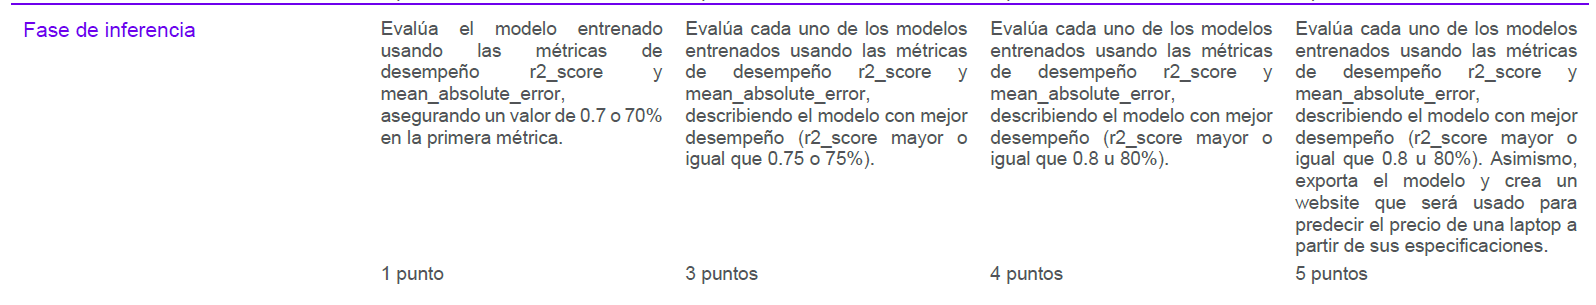

# URL de su aplicacion web
# o
# Intento (el codigo que intentaron usar)

### **NOTA:** En caso crean una aplicacion web (pagina web) usando para predecir el precio de una laptop usando pickle o Streamlit, agregar el URL de la aplicacion web aqui:

URL:

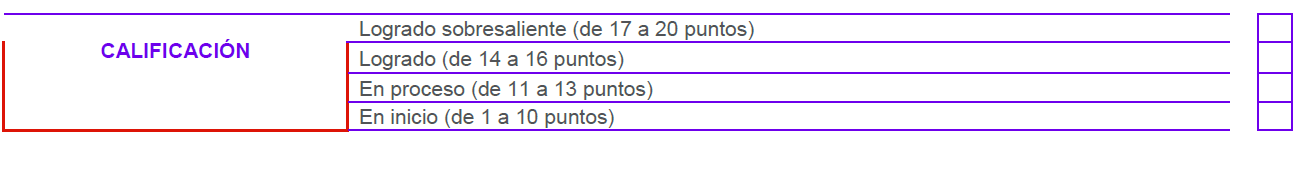